In [1]:
# FightOS - PCOS detection Using ultrasound images.

In [2]:
import tensorflow as tf

In [3]:
directory= './data/train'

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [5]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


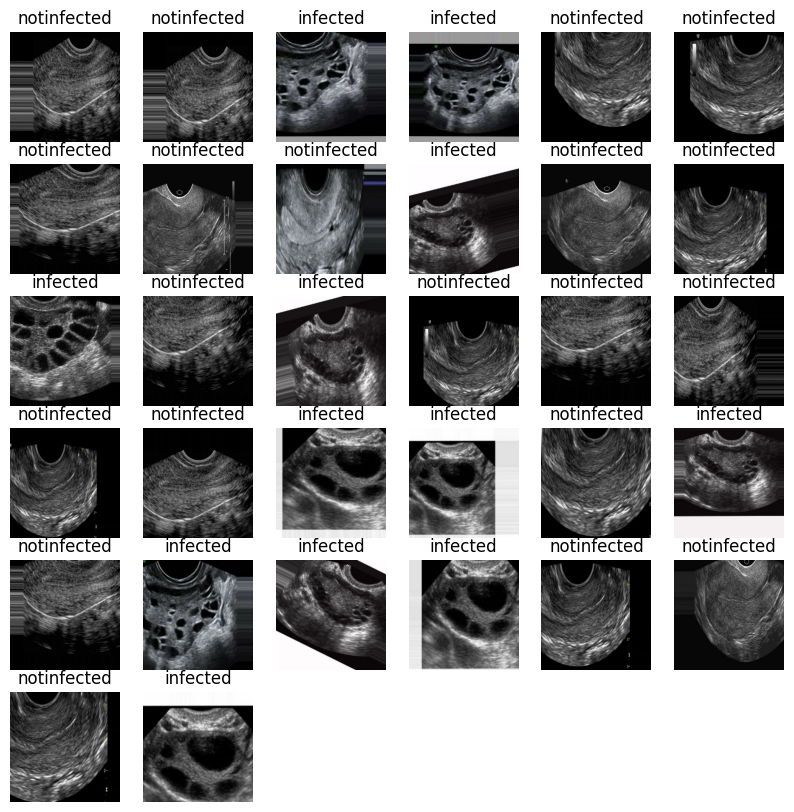

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

Augumentation


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.


Found 576 images belonging to 2 classes.


In [8]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

# Model 1

In [10]:
model1 = Sequential()
model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model1.add(Dense(2,activation='softmax'))

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 51, 51, 12)        3012      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 12)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1728)              0         
                                                                 
 dense (Dense)               (None, 2)                 3

In [12]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [13]:
history = model1.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 51s 3s/step - loss: 0.6654 - accuracy: 0.6395 - val_loss: 0.5931 - val_accuracy: 0.8021
Epoch 2/5
 3/14 [=====>........................] - ETA: 27s - loss: 0.5665 - accuracy: 0.8300

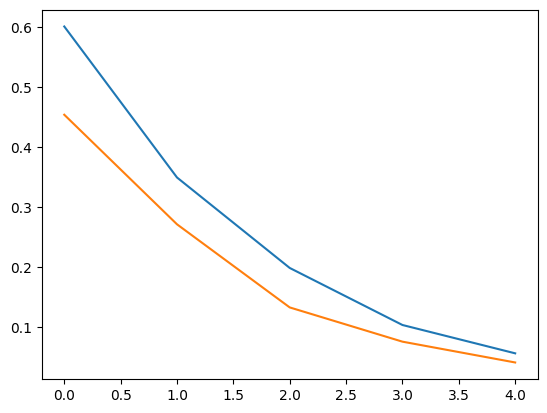

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 2 

final model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(6,6)))
model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(5,5)))
model2.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())

model2.add(Dense(2,activation='softmax'))

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model2.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model2.fit( 
  train_it,
  validation_data=val_it,
  epochs=8)

Epoch 1/8
14/14 [==============================] - 36s 2s/step - loss: 0.6627 - accuracy: 0.6395 - val_loss: 0.6115 - val_accuracy: 0.6250
Epoch 2/8
14/14 [==============================] - 32s 2s/step - loss: 0.5558 - accuracy: 0.7611 - val_loss: 0.4565 - val_accuracy: 0.8576
Epoch 3/8
14/14 [==============================] - 33s 2s/step - loss: 0.3542 - accuracy: 0.8976 - val_loss: 0.2626 - val_accuracy: 0.9184
Epoch 4/8
14/14 [==============================] - 32s 2s/step - loss: 0.2067 - accuracy: 0.9303 - val_loss: 0.1470 - val_accuracy: 0.9531
Epoch 5/8
14/14 [==============================] - 32s 2s/step - loss: 0.1247 - accuracy: 0.9614 - val_loss: 0.1179 - val_accuracy: 0.9566
Epoch 6/8
14/14 [==============================] - 32s 2s/step - loss: 0.0889 - accuracy: 0.9718 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 7/8
14/14 [==============================] - 33s 2s/step - loss: 0.0699 - accuracy: 0.9755 - val_loss: 0.0436 - val_accuracy: 0.9913
Epoch 8/8
14/14 [==========

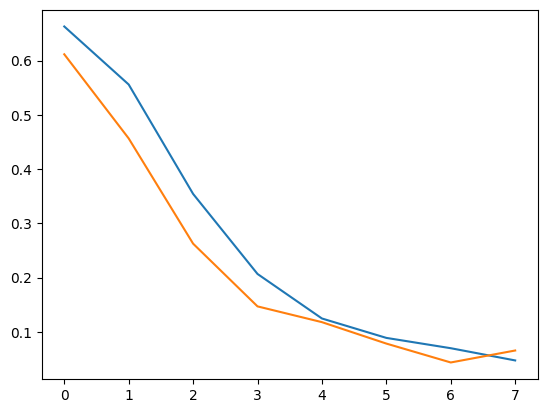

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 3


In [ ]:
model3 = Sequential()
model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(2,activation='softmax'))

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model3.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model3.fit( 
  train_it,
  validation_data=val_it,
  epochs=6)

Epoch 1/6
14/14 [==============================] - 36s 3s/step - loss: 0.6649 - accuracy: 0.5972 - val_loss: 0.6564 - val_accuracy: 0.6580
Epoch 2/6
14/14 [==============================] - 35s 3s/step - loss: 0.6337 - accuracy: 0.6595 - val_loss: 0.5880 - val_accuracy: 0.7135
Epoch 3/6
14/14 [==============================] - 36s 3s/step - loss: 0.5810 - accuracy: 0.6988 - val_loss: 0.5598 - val_accuracy: 0.6927
Epoch 4/6
14/14 [==============================] - 37s 3s/step - loss: 0.5286 - accuracy: 0.7315 - val_loss: 0.4885 - val_accuracy: 0.8056
Epoch 5/6
14/14 [==============================] - 38s 3s/step - loss: 0.4620 - accuracy: 0.7953 - val_loss: 0.4261 - val_accuracy: 0.8368
Epoch 6/6
14/14 [==============================] - 34s 2s/step - loss: 0.4119 - accuracy: 0.8294 - val_loss: 0.3637 - val_accuracy: 0.8420


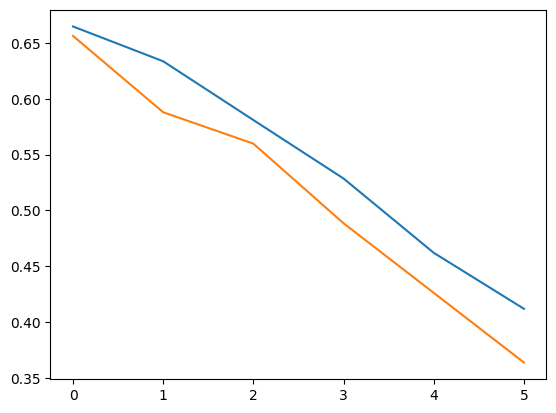

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 4

In [ ]:
model4 = Sequential()
model4.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(3,3)))
model4.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model4.add(Dense(2,activation='softmax'))

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model4.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model4.fit( 
  train_it,
  validation_data=val_it,
  epochs=10)

Epoch 1/10
14/14 [==============================] - 37s 3s/step - loss: 0.7056 - accuracy: 0.5653 - val_loss: 0.6841 - val_accuracy: 0.6181
Epoch 2/10
14/14 [==============================] - 35s 3s/step - loss: 0.6692 - accuracy: 0.6810 - val_loss: 0.6411 - val_accuracy: 0.7795
Epoch 3/10
14/14 [==============================] - 35s 2s/step - loss: 0.5931 - accuracy: 0.8123 - val_loss: 0.5115 - val_accuracy: 0.8212
Epoch 4/10
14/14 [==============================] - 35s 2s/step - loss: 0.3976 - accuracy: 0.9050 - val_loss: 0.2768 - val_accuracy: 0.9201
Epoch 5/10
14/14 [==============================] - 33s 2s/step - loss: 0.1791 - accuracy: 0.9555 - val_loss: 0.1281 - val_accuracy: 0.9566
Epoch 6/10
14/14 [==============================] - 36s 3s/step - loss: 0.0892 - accuracy: 0.9733 - val_loss: 0.0770 - val_accuracy: 0.9774
Epoch 7/10
14/14 [==============================] - 35s 2s/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0643 - val_accuracy: 0.9809
Epoch 8/10
14/14 [==

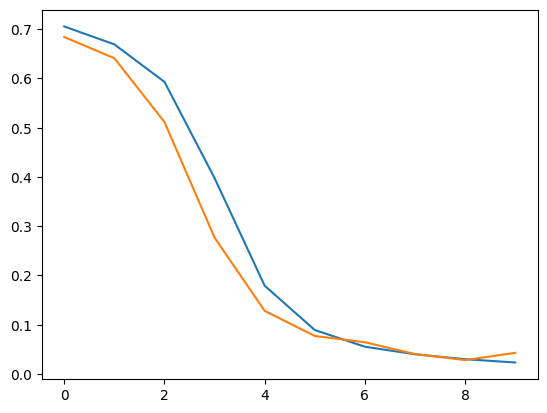

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 5

In [ ]:
model5 = Sequential()
model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))
model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))
model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(2,activation='softmax'))

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model5.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model5.fit( 
  train_it,
  validation_data=val_it,
  epochs=7)

Epoch 1/7
14/14 [==============================] - 42s 3s/step - loss: 0.6418 - accuracy: 0.6788 - val_loss: 0.5845 - val_accuracy: 0.7431
Epoch 2/7
14/14 [==============================] - 43s 3s/step - loss: 0.5244 - accuracy: 0.7967 - val_loss: 0.4553 - val_accuracy: 0.8385
Epoch 3/7
14/14 [==============================] - 48s 4s/step - loss: 0.4053 - accuracy: 0.8479 - val_loss: 0.3425 - val_accuracy: 0.8854
Epoch 4/7
14/14 [==============================] - 46s 3s/step - loss: 0.3185 - accuracy: 0.8976 - val_loss: 0.2330 - val_accuracy: 0.9358
Epoch 5/7
14/14 [==============================] - 43s 3s/step - loss: 0.2037 - accuracy: 0.9496 - val_loss: 0.1627 - val_accuracy: 0.9531
Epoch 6/7
14/14 [==============================] - 40s 3s/step - loss: 0.1444 - accuracy: 0.9703 - val_loss: 0.1223 - val_accuracy: 0.9583
Epoch 7/7
14/14 [==============================] - 45s 3s/step - loss: 0.1054 - accuracy: 0.9718 - val_loss: 0.0759 - val_accuracy: 0.9826


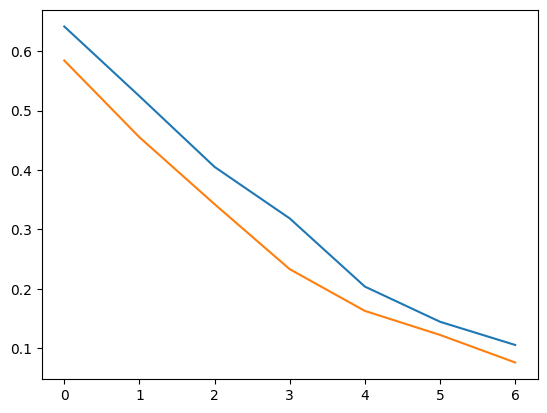

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Saving Model

In [ ]:
model2.save('model.h5')

In [ ]:
from tensorflow import keras
import numpy as np
model = keras.models.load_model('model.h5')

In [ ]:

from tensorflow.keras.utils import load_img
image = load_img('./data/train/notinfected/img4.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

1/1 [==============================] - 0s 392ms/step


In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
print(prediction)

[[8.0970880e-05 9.9991906e-01]]


In [ ]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"
#label[0][1]

In [ ]:
j=prediction.max()
get_key(j)

'notinfected'